In [67]:
# Import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [68]:
# Set additional parameters for charts and tables

# Remove column display limits
pd.set_option('display.max_columns', None)
# pd.set_option('display.height', None)
pd.set_option('display.max_rows', None)
# pd.set_option('display.width', None)
plt.rcParams['figure.figsize'] = [15, 10]
sns.set_style("white")

# Part1: Chile_data_1

In [69]:
path = '~/Desktop/MSCA 31015 DS for consulting/Assignments/week6/'
chile_data = pd.read_csv(path + 'Tourism Chile D1 - D5_updated1019.csv', encoding = 'ISO-8859-1', header = 3)

In [70]:
chile_data.drop(chile_data.iloc[:, 0:2], inplace = True, axis = 1)
chile_data = chile_data[:-1]
chile_data = chile_data.rename(columns={'VARIABLE': 'Region'})

## 1. Data Cleaning

In [71]:
# Remove $ symbol
chile_data = chile_data.replace(r'[<$]', '', regex = True)
# Remove commas from numbers
chile_data = chile_data.replace(',','', regex = True)
# Remove `-` character
chile_data = chile_data.replace('-','', regex = True)
# Replace empty values with NaNs
chile_data = chile_data.replace(r'^\s*$', np.nan, regex = True)

In [72]:
# Impute data in four columns
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
## carry out YOUR Imputation here

chile_data[['% OF LAND THAT CORRESPONDS TO FORESTS', 
            'LAND AFFECTED BY WILDFIRES', 
            'PRESERVED SITES', 
            'NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY']] = imputer.fit_transform(chile_data[['% OF LAND THAT CORRESPONDS TO FORESTS', 
                                                                                                  'LAND AFFECTED BY WILDFIRES', 
            'PRESERVED SITES', 
            'NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY']])

In [73]:
# Check NaNs in the dataset
chile_data.isnull().sum(axis = 0)[0:10]
# As we can see below, we do not have any missing values anymore

Region                                           0
CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR    0
NUMBER OF CULTURAL CENTERS                       0
WORLD CULTURAL HERITAGE SITES                    0
NUMBER OF ARCHEOLOGICAL SITES                    0
NATIONAL MONUMENTS                               0
MUSEUMS                                          0
% OF POPULATION THAT ATTENDS MUSEUMS             0
THEATERS                                         0
NUMBER OF THEATER PLAYS PER YEAR                 0
dtype: int64

In [74]:
# Convert object columns to numeric

# Select columns
cols = ['AVERAGE MONTHLY INCOME (CHILEAN PESOS)',
          'NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED PROGRAMS',
          'NUMBER OF BEDS AVAILABLE IN HOTELS, HOSTELS, B&B, ETC.',
          'NATIONAL TOURISTS ARRIVALS',
          'INTERNATIONAL TOURISTS ARRIVALS',
          'NUMBER OF VEHICLES',
          'VISITORS TO PROTECTED SITES',
          "TOURIST'S ARRIVALS THROUGH BORDER LINES"]

# Convert
chile_data[cols] = chile_data[cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)
# Now all our columns are integers or floats
#apply, lambda 

## 2. Scaling of data

In [75]:
# Finally, we need to standardize data for applying PCA

# Create a copy
chile_data_s = chile_data.copy()

# Standardize
scaler = StandardScaler()
chile_data_s.loc[:, chile_data_s.columns != 'Region'] = scaler.fit_transform(chile_data_s.loc[:, chile_data_s.columns != 'Region'])

# Set region as an index column
chile_data_s = chile_data_s.set_index('Region')

### 2.1  Eigenvalues and eigenvectors

In [76]:
# Calculate eigenvalues and vectors
cov_mat = np.cov(chile_data_s.T)
eig_val, eig_vec = np.linalg.eig(cov_mat)

#Print 
print('Eigenvectors \n%s' %eig_vec)
print('\nEigenvalues \n%s' %eig_val)

Eigenvectors 
[[-0.00326345+0.j          0.20824017+0.j         -0.06726017+0.j
  ... -0.02378319+0.00024614j -0.02378319-0.00024614j
   0.01219183+0.j        ]
 [ 0.18406724+0.j          0.02020972+0.j          0.00790098+0.j
  ...  0.06659653-0.0154511j   0.06659653+0.0154511j
  -0.0201808 +0.j        ]
 [ 0.03833065+0.j          0.12890046+0.j          0.19880302+0.j
  ...  0.04028421-0.0267662j   0.04028421+0.0267662j
  -0.00183691+0.j        ]
 ...
 [ 0.15581808+0.j         -0.13450585+0.j          0.07284215+0.j
  ... -0.04801149-0.06019647j -0.04801149+0.06019647j
   0.08699039+0.j        ]
 [ 0.05190728+0.j          0.07724022+0.j         -0.05197245+0.j
  ...  0.08229671-0.05717483j  0.08229671+0.05717483j
  -0.15283177+0.j        ]
 [-0.09074038+0.j         -0.16095204+0.j          0.08978727+0.j
  ...  0.28870725+0.j          0.28870725-0.j
  -0.06733758+0.j        ]]

Eigenvalues 
[ 2.69523928e+01+0.00000000e+00j  1.11549471e+01+0.00000000e+00j
  9.96822553e+00+0.00000000e+

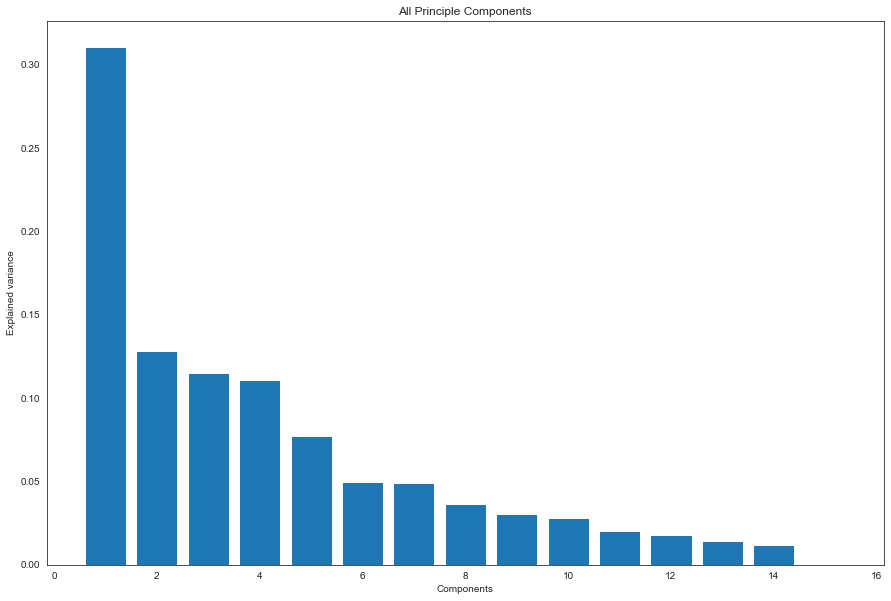

In [77]:
# Run PCA and fit the model
myPCA = PCA()
x     = myPCA.fit(chile_data_s)

# Plotting the varaince explained by each component
plt.bar(range(1,len(x.explained_variance_ )+1),x.explained_variance_ratio_)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.title('All Principle Components')
pass

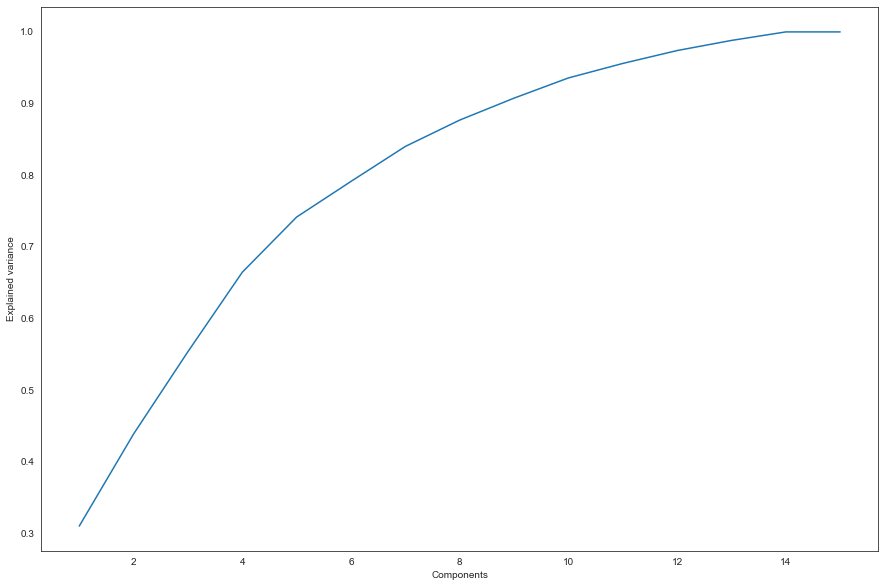

In [78]:
# Deciding on the number of principal componenets to chose
plt.plot(range(1, len(x.explained_variance_)+1), x.explained_variance_ratio_.cumsum())
plt.ylabel('Explained variance')
plt.xlabel('Components')
pass

In [79]:
x.explained_variance_ratio_.round(3)

array([0.311, 0.129, 0.115, 0.111, 0.077, 0.05 , 0.049, 0.037, 0.031,
       0.028, 0.02 , 0.018, 0.014, 0.012, 0.   ])

In [80]:
# Explore the importance of each feature for principle components
pca = PCA(n_components = 7).fit(chile_data_s)

In [81]:
vars_   = pca.explained_variance_ratio_
c_names = chile_data_s.columns
sum_ = 0

In [82]:
vars_

array([0.31056255, 0.12853437, 0.11486021, 0.11078593, 0.07699142,
       0.04971541, 0.04878801])

In [83]:
print('Variance:  Projected dimension')
print('------------------------------')
for idx, row in enumerate(pca.components_):
    output = 100.0*vars_[idx] 
    print(vars_[idx])
    output = '{0:4.1f}%:    '.format(100.0 * vars_[idx])
    output += " + ".join("{0:5.2f} * {1:s}".format(val, name) \
                      for val, name in zip(row, c_names))
    sum_ += 100*vars_[idx]
    print(output)

print('Total variance explained by the 7 components {0:4.1f}%'.format(sum_))
# Total variance explained by the 7 components 84.0%

Variance:  Projected dimension
------------------------------
0.3105625513394758
31.1%:    -0.00 * CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR +  0.18 * NUMBER OF CULTURAL CENTERS +  0.04 * WORLD CULTURAL HERITAGE SITES + -0.01 * NUMBER OF ARCHEOLOGICAL SITES +  0.19 * NATIONAL MONUMENTS +  0.18 * MUSEUMS +  0.04 * % OF POPULATION THAT ATTENDS MUSEUMS +  0.18 * THEATERS +  0.18 * NUMBER OF THEATER PLAYS PER YEAR +  0.18 * LIBRARIES +  0.19 * GALERIES + -0.09 * % OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP +  0.18 * NUMBER OF EXHIBITS + -0.00 * ARTISTIC EVENTS (MUSIC, DANCE AND FOLKLOR, THEATRE, ETC) PER YEAR +  0.00 * MAJOR SPORTS EVENTS PER YEAR +  0.08 * OBSERVATORIES, ZOOS, AQUARIUMS, BOTANICAL GARDENS +  0.00 * ARTWORK SITES + -0.02 * POPULAR ARCHITECTURE SITES +  0.03 * HISTORICAL SITES +  0.07 * LOCAL MARKETS +  0.06 * CULTURAL SITES LEVEL III (INTERNATIONAL) +  0.15 * CULTURA SITES LEVEL II (NATIONAL) +  0.19 * CULTURAL SITES LEVEL I (LOCAL) +  0.12 * HERITAGE ARCHITECTURA

In [84]:
# We also can see this information for each component separately
# For instance, these are results for the Principal Component 1 (sorted)
pd.DataFrame(np.column_stack((chile_data_s.columns, pca.components_[0]))).sort_values(by = 1, ascending = False)[0:10]
# The same logic can be applied to all other principal components

,0,1
55,NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED ...,0.190521
75,NUMBER OF VEHICLES,0.190228
4,NATIONAL MONUMENTS,0.189368
10,GALERIES,0.189226
26,% LAND THAT CORRESPONDS TO HUMAN SETTLEMENTS,0.189172
56,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED...,0.188437
58,CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURIS...,0.186791
22,CULTURAL SITES LEVEL I (LOCAL),0.186464
54,TOURISM-ORIENTED INSTITUTIONS,0.185947
66,NUMBER OF CERTIFIED CONSULTANTS FOR TOURISM-RE...,0.185657


In [85]:
# Calculate loadings
myPCA     = PCA(n_components = 7)
pca_model = myPCA.fit(chile_data_s)

# Print
# print("The loadings are are \n {}".format(pca_model.components_))

In [86]:
# Calculate factor scores
pca_model = myPCA.fit_transform(chile_data_s)
PCcomponents = pd.DataFrame(data = pca_model, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
print("\n The Factor scores are")
PCcomponents


 The Factor scores are


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-2.386142,1.128396,0.417084,-1.039372,-2.383579,5.560673,0.896446
1,-1.603717,2.205502,0.000489,-3.106017,1.359288,2.146064,-0.009668
2,-1.163348,3.041472,0.920221,-3.063266,1.643872,-1.248495,-3.558966
3,-3.022894,1.686132,-1.287520,-3.948946,1.601311,0.192783,-1.124276
4,0.071800,-3.459654,1.681821,-3.193220,1.184838,-2.570795,4.848208
5,5.666810,-5.185133,7.767526,-1.476143,-1.618477,0.063266,-2.100251
6,16.071582,4.590960,-2.013523,1.269896,-1.218331,0.133082,1.318211
7,-0.533601,-4.130965,-2.604111,-1.666633,-1.291375,0.430387,0.879329
8,-0.906211,-3.216091,-3.517245,0.026947,-0.489855,0.118975,0.163107
9,2.200100,-0.453991,-3.581660,-0.554127,2.180578,-2.483251,-2.047424


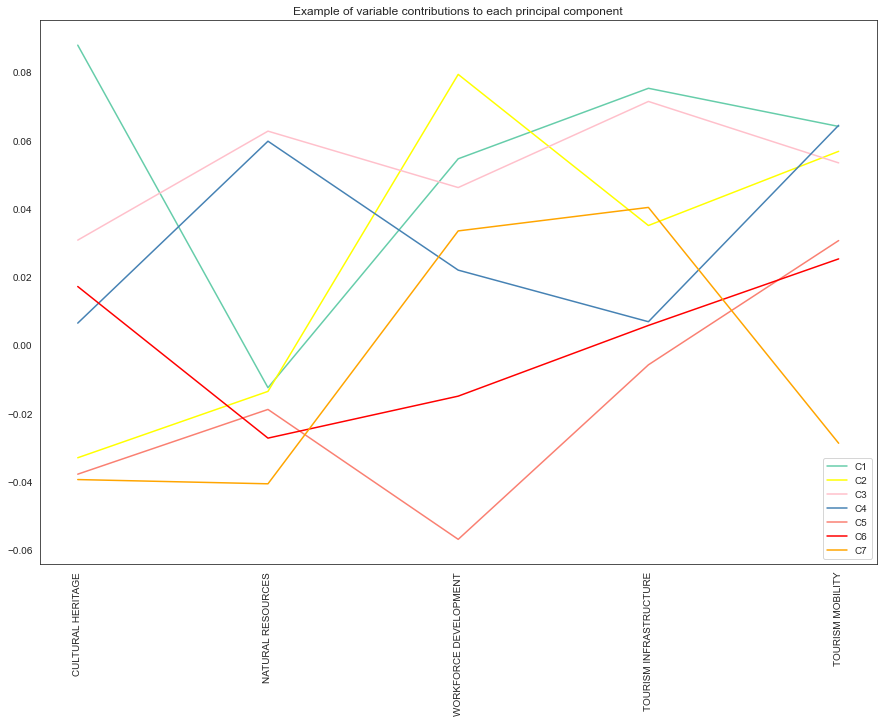

In [87]:
# Example of different variables in each component

# Fit the model
myPCA = PCA(n_components = 7)
pca_model = myPCA.fit(chile_data_s)
y_axis = [0,0,0,0,0,0,0]
for i in range(0,7):
    y_axis[i]=[np.mean(pca_model.components_[i][0:24]), np.mean(pca_model.components_[i][24:47]), 
               np.mean(pca_model.components_[i][47:59]), np.mean(pca_model.components_[i][59:69]),
               np.mean(pca_model.components_[i][69:81])]
# Plot
x_axis = ['CULTURAL HERITAGE', 'NATURAL RESOURCES', 'WORKFORCE DEVELOPMENT', 'TOURISM INFRASTRUCTURE', 'TOURISM MOBILITY']
plt.plot(x_axis,y_axis[0], color = 'mediumaquamarine', label = "C1")
plt.plot(x_axis,y_axis[1], color = 'yellow', label = "C2")
plt.plot(x_axis,y_axis[2], color = 'pink', label = "C3")
plt.plot(x_axis,y_axis[3], color = 'steelblue', label = "C4")
plt.plot(x_axis,y_axis[4], color = 'salmon', label = "C5")
plt.plot(x_axis,y_axis[5], color = 'red', label = "C6")
plt.plot(x_axis,y_axis[6], color = 'orange', label = "C7")
plt.xticks(rotation = 90)
plt.title('Example of variable contributions to each principal component')
plt.legend()
pass

## 3. Developing a scoring system for 5 dimensions

### Step 1 - Calculate a weighted average for each variable in principal components.

In [88]:
pca_model.components_[0]*vars_[0]

array([-1.01350429e-03,  5.71643913e-02,  1.19040634e-02, -2.24659372e-03,
        5.88105989e-02,  5.51927743e-02,  1.33196707e-02,  5.61548049e-02,
        5.45795159e-02,  5.69179799e-02,  5.87665871e-02, -2.85479579e-02,
        5.48878143e-02, -7.26618254e-04,  1.06940210e-03,  2.55903835e-02,
        4.87759056e-05, -7.56539162e-03,  1.04280845e-02,  2.03788255e-02,
        1.95805156e-02,  4.56138553e-02,  5.79088001e-02,  3.70380502e-02,
       -2.50347234e-02, -2.93480764e-02,  5.87497992e-02, -8.83070567e-04,
        5.36438361e-02, -8.23946979e-03,  1.05460860e-02,  1.42172116e-02,
       -2.09160229e-02, -2.14957927e-02, -2.08790616e-02, -2.43781250e-02,
       -8.74365266e-03, -1.33495218e-02, -1.70058358e-02,  1.98956674e-02,
       -1.32852751e-02, -9.89292965e-03, -1.09334091e-02, -1.95795540e-03,
       -1.26468380e-02,  6.14179982e-03, -1.34084412e-02,  2.14580628e-03,
        1.74632094e-02, -2.67864706e-03, -4.38520687e-03, -2.70966136e-03,
        2.70436654e-02, -

In [89]:
# Creating a dataframe of weights
weights = pd.DataFrame(np.column_stack((chile_data_s.columns, pca_model.components_[0] * 
                                        pca_model.explained_variance_ratio_[0],
                                        pca_model.components_[1] * pca_model.explained_variance_ratio_[1],
                                        pca_model.components_[2] * pca_model.explained_variance_ratio_[2],
                                        pca_model.components_[3] * pca_model.explained_variance_ratio_[3],
                                        pca_model.components_[4] * pca_model.explained_variance_ratio_[4],
                                        pca_model.components_[5] * pca_model.explained_variance_ratio_[5],
                                        pca_model.components_[6] * pca_model.explained_variance_ratio_[6])))

In [90]:
weights = weights.set_index(0)

# Create a weighted average
weights['weighted_average'] = weights.sum(axis = 1)/np.sum(pca_model.explained_variance_ratio_)

# Print
weights

,1,2,3,4,5,6,7,weighted_average
0,,,,,,,,
CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,-0.0010135,-0.026766,-0.00772552,-0.00715039,-0.0100109,0.00849465,0.00587723,-0.045576
NUMBER OF CULTURAL CENTERS,0.0571644,-0.00259764,0.000907509,0.00659591,0.0036928,-0.00260661,-0.00364229,0.070830
WORLD CULTURAL HERITAGE SITES,0.0119041,-0.0165681,0.0228346,-0.0018949,0.0042953,0.00555241,-0.003667,0.026726
NUMBER OF ARCHEOLOGICAL SITES,-0.00224659,9.958e-05,0.0151014,-0.0179738,-0.00486953,0.0123346,-0.00910945,-0.007931
NATIONAL MONUMENTS,0.0588106,0.0068198,0.000424673,0.00349642,-0.00427658,3.51305e-05,-0.000404655,0.077246
MUSEUMS,0.0551928,0.0106075,-0.00434792,-0.000236542,0.00580018,-0.00392685,-0.00398987,0.070336
% OF POPULATION THAT ATTENDS MUSEUMS,0.0133197,0.0158272,0.0218144,-0.0138457,-0.00217433,0.000666788,-0.00590614,0.035349
THEATERS,0.0561548,0.00962561,-0.00858994,0.00520607,-0.00252551,-0.000540368,0.00232205,0.073375
NUMBER OF THEATER PLAYS PER YEAR,0.0545795,0.0132674,-0.007722,0.00415043,-0.00321395,0.000358264,0.00351443,0.077281


### Step 2. Calculate a score for each dimension.

In [91]:
chile_data_s.head(1)

,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,GALERIES,% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP,NUMBER OF EXHIBITS,"ARTISTIC EVENTS (MUSIC, DANCE AND FOLKLOR, THEATRE, ETC) PER YEAR",MAJOR SPORTS EVENTS PER YEAR,"OBSERVATORIES, ZOOS, AQUARIUMS, BOTANICAL GARDENS",ARTWORK SITES,POPULAR ARCHITECTURE SITES,HISTORICAL SITES,LOCAL MARKETS,CULTURAL SITES LEVEL III (INTERNATIONAL),CULTURA SITES LEVEL II (NATIONAL),CULTURAL SITES LEVEL I (LOCAL),HERITAGE ARCHITECTURAL HOUSES,% OF LAND THAT CORRESPONDS TO FORESTS,NATIONAL PROTECTED SITES (%),% LAND THAT CORRESPONDS TO HUMAN SETTLEMENTS,TOXIC WASTE DISPOSAL (TONS/100 hab.),NUMBER OF ENVIRONMENTAL COMPLAINTS PRESENTED,ENVIRONMENTAL ISSUES PER MILLION HABITANTS,NUMBER OF BEACHES AND BEACH RESORTS,LAND AFFECTED BY WILDFIRES,NATURAL PROTECTED SITES LEVEL III (INTERNATIONAL),NATURAL PROTECTED SITES LEVEL II (NATIONAL),"RIVERS, LAKES AND WATERFALLS","MOUNTAINS, VOLCANOES AND MOUNTAIN SYSTEMS",GEISERS AND THERMAL CENTERS,PIERS AND SEASHORES,GLACIERS AND WINTER VACATION LOCATIONS,VALLEYS,DESERTS AND DUNES,ISLANDS AND PENINSULAS,PALEONTOLOGY SITES,HIKING TRAILS,PRESERVED SITES,SEASHORE PROTECTED SITES,BIOSHPERE RESERVES,% AVAILABLE WORKFORCE,% POPULATION ORIENTED TOWARDS TOURISM,AVERAGE MONTHLY INCOME (CHILEAN PESOS),5 POPULATION WITH PRIMARY EDUCATION,% POPULATION WITH SECONDARY EDUCATION,AVERAGE NUMBER OF YEARS STUDYING,HIGHER EDUCATION AND TECHNICAL INSTITUTIONS,TOURISM-ORIENTED INSTITUTIONS,NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED PROGRAMS,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED PROGRAMS,DENSITY OF TOURISM GUIDES (PER 100.000 HABITANTS),CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURISM STANDARDS,% OF TOURISM-RELATED ROOMS AVAILABLE THROUGHOUT THE YEAR,ROOMS PER 1000 HABITANTS,"NUMBER OF BEDS AVAILABLE IN HOTELS, HOSTELS, B&B, ETC.","TOURISM-RELATED WORKFORCE (PER 10,000 EMPLOYEES)",AVERAGE % OF OCCUPANCY THROUGHOUT THE YEAR,AVERAGE NUMBER OF NIGHTS THAT TOURISTS SPEND,NUMBER OF ESTABLISHMENTS WITH A TOURIST-RELATED CERTIFICATION,NUMBER OF CERTIFIED CONSULTANTS FOR TOURISM-RELATED CERTIFICATIONS,TOURISM-RELATED INVESTEMENTS (MILLION USD) BY CHAMBER OF COMMERCE MEMBERS,TOURISM-RELATED INFRASTRUCTURE INVESTMENT (MILLION USD/YEAR),NATIONAL TOURISTS ARRIVALS,INTERNATIONAL TOURISTS ARRIVALS,NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY,DENSITY OF AIRPORTS,DENSITY OF ROADS AND HIGHWAYS,% OF ROADS THAT ARE HIGHWAYS (FOUR LINES),NUMBER OF VEHICLES,VISITORS TO PROTECTED SITES,NUMBER OF CRUISES THAT ARRIVE PER YEAR,TOURIST'S ARRIVALS THROUGH BORDER LINES,SECONDARY ROADS (KMS),NUMBER OF INTERNATIONAL BORDER GATES
Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Arica y Parinacota,1.672984,-0.959349,-0.559017,2.121142,-0.617597,-0.721316,0.440365,-0.475143,-0.335687,-0.724558,-0.261024,1.389477,-0.368577,-0.668153,-0.454859,-0.6799,0.067176,0.326242,-0.61667,0.294619,0.360486,-0.136165,-0.834058,-0.355859,0.0,0.643982,-0.248227,1.426648,-0.576151,-0.41055,-0.836955,0.0,0.597479,-0.772105,-0.685892,0.015686,0.100452,-0.947748,-0.75561,-0.011653,-0.118729,-0.580615,-0.855528,-0.386889,1.657385e-15,-0.620174,0.476731,-1.851488,-0.362785,-0.632189,0.64653,2.619732,1.554178,1.133129,-0.884585,-0.47762,-0.477498,-0.135893,-0.524853,0.790598,0.091521,-1.132711,0.620125,0.16632,0.816497,-0.347974,-0.437516,-0.521005,-0.482777,-0.920689,-0.322261,2.514051,1.231771,-0.062345,-0.946158,-0.519001,-0.762949,0.6211,-0.126593,-0.862524,0.528271


In [92]:
# Ranking for dimension 1: CULTURAL HERITAGE AND EVENTS

# Create a dataframe for relevant variables
dim1 = chile_data_s.iloc[:, 0:24].mul(weights['weighted_average'][0:24], axis = 1)

# Create a score ranking
dim1['Ranking 1'] = dim1.sum(axis = 1)

# Sort by score
dim1.sort_values(by = 'Ranking 1', ascending = False).head()

,CULTURAL EVENTS SCHEDULED THROUGHOUT THE YEAR,NUMBER OF CULTURAL CENTERS,WORLD CULTURAL HERITAGE SITES,NUMBER OF ARCHEOLOGICAL SITES,NATIONAL MONUMENTS,MUSEUMS,% OF POPULATION THAT ATTENDS MUSEUMS,THEATERS,NUMBER OF THEATER PLAYS PER YEAR,LIBRARIES,GALERIES,% OF POPULATION ASSOCIATED TO AN INDIGENOUS GROUP,NUMBER OF EXHIBITS,"ARTISTIC EVENTS (MUSIC, DANCE AND FOLKLOR, THEATRE, ETC) PER YEAR",MAJOR SPORTS EVENTS PER YEAR,"OBSERVATORIES, ZOOS, AQUARIUMS, BOTANICAL GARDENS",ARTWORK SITES,POPULAR ARCHITECTURE SITES,HISTORICAL SITES,LOCAL MARKETS,CULTURAL SITES LEVEL III (INTERNATIONAL),CULTURA SITES LEVEL II (NATIONAL),CULTURAL SITES LEVEL I (LOCAL),HERITAGE ARCHITECTURAL HOUSES,Ranking 1
Region,,,,,,,,,,,,,,,,,,,,,,,,,
Metropolitana,0.028078,0.192903,-0.014940,0.005556,0.269217,0.214340,0.018570,0.266501,0.287588,0.180319,0.259461,-0.008320,0.269909,0.03980,0.018823,0.008948,0.019085,-0.001139,0.000772,0.009099,-0.001584,0.180688,0.233427,0.028090,2.505190
ValparaÃ­so,-0.010561,0.101121,0.074702,-0.012192,0.064396,0.017672,0.042596,-0.012705,-0.015399,0.042557,0.041223,-0.009270,-0.007536,-0.03184,-0.028235,0.014540,0.019085,0.001101,-0.008496,0.009099,0.069700,0.198829,0.021390,0.110586,0.692363
BiobÃ­o,0.024214,0.076968,-0.014940,0.006328,-0.021578,0.086078,-0.008459,0.009455,-0.007333,0.056140,0.041223,-0.008531,0.064394,0.03980,0.018823,-0.007829,-0.003817,-0.000722,-0.010041,-0.001400,-0.008373,-0.091432,0.071609,0.002380,0.312954
Los Lagos,0.039669,0.038323,0.029881,0.006328,-0.017363,0.009121,-0.001702,-0.008273,-0.017828,-0.005950,-0.031523,0.009313,-0.017811,0.03980,0.018823,-0.007829,0.041987,0.000580,0.005406,0.003850,-0.008373,0.079096,0.004650,-0.005204,0.204969
Antofagasta,0.039669,-0.034136,-0.014940,-0.015279,-0.003034,0.051875,0.055359,-0.008273,-0.021181,-0.036995,-0.019399,-0.006631,-0.017811,0.01592,0.018823,0.008948,0.030536,-0.000149,-0.020854,-0.011899,-0.001584,-0.015239,-0.006510,-0.010938,-0.023722


In [27]:
# Ranking for dimension 2: CULTURAL HERITAGE AND EVENTS

# Create a dataframe for relevant variables
dim2 = chile_data_s.iloc[:, 24:47].mul(weights['weighted_average'][24:47], axis = 1)

# Create a score ranking
dim2['Ranking 2'] = dim2.sum(axis = 1)

# Sort by score
dim2.sort_values(by = 'Ranking 2', ascending = False).head()

,% OF LAND THAT CORRESPONDS TO FORESTS,NATIONAL PROTECTED SITES (%),% LAND THAT CORRESPONDS TO HUMAN SETTLEMENTS,TOXIC WASTE DISPOSAL (TONS/100 hab.),NUMBER OF ENVIRONMENTAL COMPLAINTS PRESENTED,ENVIRONMENTAL ISSUES PER MILLION HABITANTS,NUMBER OF BEACHES AND BEACH RESORTS,LAND AFFECTED BY WILDFIRES,NATURAL PROTECTED SITES LEVEL III (INTERNATIONAL),NATURAL PROTECTED SITES LEVEL II (NATIONAL),"RIVERS, LAKES AND WATERFALLS","MOUNTAINS, VOLCANOES AND MOUNTAIN SYSTEMS",GEISERS AND THERMAL CENTERS,PIERS AND SEASHORES,GLACIERS AND WINTER VACATION LOCATIONS,VALLEYS,DESERTS AND DUNES,ISLANDS AND PENINSULAS,PALEONTOLOGY SITES,HIKING TRAILS,PRESERVED SITES,SEASHORE PROTECTED SITES,BIOSHPERE RESERVES,Ranking 2
Region,,,,,,,,,,,,,,,,,,,,,,,,
Los Lagos,0.039944,0.001468,-0.030505,-0.013954,-0.029854,0.01565,-0.000457,0.008902,-0.000437,-0.004235,-0.010288,-0.015863,0.000245,-0.001953,0.003823,-0.004355,0.021719,0.207479,0.043709,0.030237,2.027671e-01,0.106482,0.006901,0.577425
Metropolitana,-0.016421,-0.003741,0.268483,0.015586,0.138076,0.01565,0.020110,0.008589,0.000766,0.019904,0.034944,0.011442,-0.000108,0.006662,0.000348,0.001967,0.021719,-0.034927,0.043709,0.030237,-2.644788e-02,-0.030423,-0.013803,0.512320
ValparaÃ­so,-0.016877,-0.003116,0.051114,-0.005063,0.104490,0.01565,-0.047304,-0.043033,-0.000570,-0.023292,0.026962,0.023145,-0.000179,-0.005399,0.003823,0.029363,0.012914,-0.034927,0.043709,-0.064535,-2.644788e-02,0.106482,0.027605,0.174514
Coquimbo,-0.023380,-0.003915,-0.023316,-0.036409,-0.029854,0.01565,-0.022167,-0.002830,0.000633,0.011646,0.016319,0.023145,-0.000321,-0.011429,0.009037,0.020934,0.021719,0.035449,0.019426,0.030237,-2.644788e-02,0.060847,0.006901,0.091873
Arica y Parinacota,0.000000,0.003551,-0.018664,0.042017,-0.029854,0.01565,0.014397,-0.000000,-0.000570,0.013552,0.024301,-0.000260,0.000033,0.004939,0.009037,-0.000140,0.004109,-0.034927,0.043709,0.016698,1.017919e-16,-0.030423,0.006901,0.084054


In [28]:
# Ranking for dimension 3: CULTURAL HERITAGE AND EVENTS

# Create a dataframe for relevant variables
dim3 = chile_data_s.iloc[:, 47:59].mul(weights['weighted_average'][47:59], axis = 1)

# Create a score ranking
dim3['Ranking 3'] = dim1.sum(axis = 1)

# Sort by score
dim3.sort_values(by = 'Ranking 3', ascending = False).head()

,% AVAILABLE WORKFORCE,% POPULATION ORIENTED TOWARDS TOURISM,AVERAGE MONTHLY INCOME (CHILEAN PESOS),5 POPULATION WITH PRIMARY EDUCATION,% POPULATION WITH SECONDARY EDUCATION,AVERAGE NUMBER OF YEARS STUDYING,HIGHER EDUCATION AND TECHNICAL INSTITUTIONS,TOURISM-ORIENTED INSTITUTIONS,NUMBER OF COLLEGE STUDENTS IN TOURISM RELATED PROGRAMS,AVERAGE NUMBER OF GRADUATES IN TOURISM-RELATED PROGRAMS,DENSITY OF TOURISM GUIDES (PER 100.000 HABITANTS),CERTIFIED WORKERS ON HIGHLY-COMPETITIVE TOURISM STANDARDS,Ranking 3
Region,,,,,,,,,,,,,
Metropolitana,0.008077,0.098508,0.014620,0.000113,0.000244,0.072541,0.024056,0.199376,0.265943,0.278337,0.001871,0.281558,5.010380
ValparaÃ­so,0.000266,-0.031328,-0.007834,0.001243,-0.001345,0.036669,0.013482,0.114735,0.052887,0.039654,0.001174,0.030211,1.384727
BiobÃ­o,-0.015849,-0.025182,-0.012091,0.002373,-0.000074,-0.005182,0.018769,0.077117,0.054652,0.040665,0.002176,0.001358,0.625908
Los Lagos,0.003635,0.326682,-0.011874,0.001243,0.002256,-0.053011,0.008195,0.011285,-0.020891,-0.021974,0.000349,0.008707,0.409938
Antofagasta,0.003407,-0.029023,0.025698,0.008022,0.002256,0.036669,-0.003701,-0.016928,-0.028691,-0.028288,0.000394,-0.045389,-0.047443


In [29]:
# Ranking for dimension 4: CULTURAL HERITAGE AND EVENTS

# Create a dataframe for relevant variables
dim4 = chile_data_s.iloc[:, 59:69].mul(weights['weighted_average'][59:69], axis = 1)

# Create a score ranking
dim4['Ranking 4'] = dim4.sum(axis = 1)

# Sort by score
dim4.sort_values(by = 'Ranking 4', ascending = False).head()

,% OF TOURISM-RELATED ROOMS AVAILABLE THROUGHOUT THE YEAR,ROOMS PER 1000 HABITANTS,"NUMBER OF BEDS AVAILABLE IN HOTELS, HOSTELS, B&B, ETC.","TOURISM-RELATED WORKFORCE (PER 10,000 EMPLOYEES)",AVERAGE % OF OCCUPANCY THROUGHOUT THE YEAR,AVERAGE NUMBER OF NIGHTS THAT TOURISTS SPEND,NUMBER OF ESTABLISHMENTS WITH A TOURIST-RELATED CERTIFICATION,NUMBER OF CERTIFIED CONSULTANTS FOR TOURISM-RELATED CERTIFICATIONS,TOURISM-RELATED INVESTEMENTS (MILLION USD) BY CHAMBER OF COMMERCE MEMBERS,TOURISM-RELATED INFRASTRUCTURE INVESTMENT (MILLION USD/YEAR),Ranking 4
Region,,,,,,,,,,,
Metropolitana,0.176745,-0.005552,0.151894,-0.004538,0.156454,-0.003975,0.093013,0.301501,0.129180,0.018534,1.013256
ValparaÃ­so,-0.008081,-0.001808,0.157523,-0.000635,-0.036338,0.001704,0.080666,0.026308,0.164599,0.021258,0.405196
Los Lagos,-0.035734,0.002565,0.099583,0.000234,-0.024168,0.007383,0.241175,-0.010038,-0.020377,-0.005855,0.254766
Coquimbo,-0.023189,-0.000882,0.027113,-0.003656,-0.001110,-0.021012,-0.042802,-0.020423,0.050076,0.085215,0.049329
AraucanÃ­a,-0.061090,-0.003250,0.038719,-0.002310,0.012981,-0.012494,0.093013,-0.025615,-0.026807,-0.008839,0.004307


In [30]:
# Ranking for dimension 5: CULTURAL HERITAGE AND EVENTS

# Create a dataframe for relevant variables
dim5 = chile_data_s.iloc[:, 69:81].mul(weights['weighted_average'][69:81], axis = 1)

# Create a score ranking
dim5['Ranking 5'] = dim5.sum(axis = 1)

# Sort by score
dim5.sort_values(by = 'Ranking 5', ascending = False).head()

,NATIONAL TOURISTS ARRIVALS,INTERNATIONAL TOURISTS ARRIVALS,NUMBER OF PEOPLE TRAVELING OUT OF THE COUNTRY,DENSITY OF AIRPORTS,DENSITY OF ROADS AND HIGHWAYS,% OF ROADS THAT ARE HIGHWAYS (FOUR LINES),NUMBER OF VEHICLES,VISITORS TO PROTECTED SITES,NUMBER OF CRUISES THAT ARRIVE PER YEAR,TOURIST'S ARRIVALS THROUGH BORDER LINES,SECONDARY ROADS (KMS),NUMBER OF INTERNATIONAL BORDER GATES,Ranking 5
Region,,,,,,,,,,,,,
Metropolitana,0.089442,0.326733,0.168270,-0.009218,0.033727,0.105649,0.268562,-0.012999,-0.034666,0.285755,0.008728,0.001532,1.231514
Los Lagos,0.020777,0.005730,0.003734,0.242869,0.007119,-0.008061,-0.018203,0.126167,0.115434,-0.003540,0.074567,-0.001021,0.565572
ValparaÃ­so,0.082154,0.006637,0.015188,-0.025720,0.045955,0.032697,0.027322,0.008639,0.131516,0.070209,-0.016004,0.001532,0.380127
Arica y Parinacota,-0.049367,-0.028702,0.180232,0.095077,0.001714,-0.041159,-0.038836,-0.036609,0.035023,-0.011353,-0.030269,-0.001021,0.074729
BiobÃ­o,0.067557,-0.030051,-0.047279,-0.042686,0.027087,0.066302,0.026217,-0.024601,-0.034666,-0.061805,0.071704,0.001532,0.019311


In [31]:
scoring_data = pd.concat([dim1.iloc[:,-1:], dim2.iloc[:,-1:], dim3.iloc[:,-1:], dim4.iloc[:,-1:], dim5.iloc[:,-1:]], axis=1)
scoring_data

,Ranking 1,Ranking 2,Ranking 3,Ranking 4,Ranking 5
Region,,,,,
Arica y Parinacota,-0.415952,0.084054,-0.831904,-0.142092,0.074729
TarapacÃ¡,-0.173136,-0.013629,-0.346272,-0.051780,-0.111462
Antofagasta,-0.023722,-0.210598,-0.047443,0.003949,-0.066772
Atacama,-0.315089,-0.340057,-0.630178,-0.203309,-0.415831
Coquimbo,-0.250916,0.091873,-0.501832,0.049329,-0.217581
ValparaÃ­so,0.692363,0.174514,1.384727,0.405196,0.380127
Metropolitana,2.505190,0.512320,5.010380,1.013256,1.231514
O'Higgins,-0.571647,-0.122728,-1.143294,-0.318736,-0.295041
Maule,-0.476902,-0.145830,-0.953804,-0.242213,-0.240416


# Part2: Chile_data_2

## 1. Data Importing and Data Cleaning

In [32]:
path = '~/Desktop/MSCA 31015 DS for consulting/Assignments/week7/'
chile_data_2 = pd.read_csv(path + 'Tourism Chile D6 - D10 (3_updated1019).csv', encoding = 'ISO-8859-1', header = 7)

In [33]:
chile_data_2.head()

,Regions,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants",Ski resorts,Major shopping centers,"Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Number of vineyards,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per individual participating on a strike,Banks per one million habitants,Temporary residents,Exports (volume in million chilean pesos),Density of tourism offices per one million habitants,Number of tourism information offices,Average number of internet searches for main tourist attractions,Yearly budget for tourism promotion ($M),Yearly budget for international tourism promotion ($M),Governmental resources allocated to tourism promotion ($M),Public infrastructure investments related to the tourism sector ($),Entrepreneurial and Innovation funds allocated to tourism related projects ($),Seed funds allocated to the tourism sector ($),Governmental funds devoted to tourism development ($),Number of regional strategy plans for tourism development,Unnamed: 51
0,Arica y Parinacota (XV),35.857,19.563,12,21.619,43.766,0,5.273,1,20,20.038,5,0.000,-,-,240.55,17,6,-,0.318,0.260,42.184,15.819,0.513,"11,884,613",0.426,"26,467","2,387",981,319,265,7.3,8.2,84.369,1,11,253,94.915,"45,560",137,5.273,"6,517","1,060,490","193,364","118,413","92,641","36,370,835","11,757,543","446,922","24,729,573",1,NaN
1,Tarapac (I),25.947,26.616,2,18.958,60.264,0,4.185,3,9,22.180,5,40.134,-,2,213.07,28,0,-,0.421,0.468,87.884,0.000,0.516,"14,740,693",0.398,"76,896","1,862","1,105",593,592,4.8,13.4,485.457,6,14.9,"59,745",138.104,"83,265","3,236",4.185,"7,600","1,750,481","74,404","13,600",-,"42,364,100","12,796,789","355,208","29,714,382",2,NaN
2,Antofagasta (II),37.248,35.446,22,29.960,69.233,3,4.049,3,36,20.446,2,14.292,-,3,259.23,39,2,-,0.546,0.314,109.315,0.000,0.381,"22,383,612",0.495,"123,017","4,228","2,324",7,765,6.2,7.3,12.146,13,9.6,"30,220",178.143,"238,010","16,666",4.049,"16,280","2,846,340","200,000","149,000","149,744","38,262,875","29,066,423","192,572","50,841,622",1,NaN
3,Atacama (III),44.823,26.933,19,25.478,56.225,1,3.932,1,9,18.479,3,32.437,-,-,184.01,35,1,-,0.390,0.197,66.841,0.000,0.488,"17,068,077",0.533,"21,705","3,125",965,14,504,6.4,10.2,15.727,3,29.3,"17,860",145.477,"53,046","3,456",3.932,"11,614","556,668","94,100","187,035",-,"35,948,639","16,986,593","233,225","30,224,699",2,NaN
4,Coquimbo (IV),37.632,25.165,9,17.805,47.745,3,3.316,3,13,6.963,3,14.091,-,1,150.06,72,3,-,0.288,0.218,155.833,0.000,0.396,"20,225,710",0.449,"69,974","4,203","1,831",100,"1,082",6.0,12.3,11.605,3,29.0,"1,431",112.730,"275,447","2,229",1.658,"11,056","5,364,222","189,900","72,917",-,"64,917,630","33,222,779","673,800","44,790,979",3,NaN


In [34]:
chile_data_2.tail()

,Regions,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants",Ski resorts,Major shopping centers,"Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Number of vineyards,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per individual participating on a strike,Banks per one million habitants,Temporary residents,Exports (volume in million chilean pesos),Density of tourism offices per one million habitants,Number of tourism information offices,Average number of internet searches for main tourist attractions,Yearly budget for tourism promotion ($M),Yearly budget for international tourism promotion ($M),Governmental resources allocated to tourism promotion ($M),Public infrastructure investments related to the tourism sector ($),Entrepreneurial and Innovation funds allocated to tourism related projects ($),Seed funds allocated to the tourism sector ($),Governmental funds devoted to tourism development ($),Number of regional strategy plans for tourism development,Unnamed: 51
14,Magallanes y Antrtica (XII),59.008,59.340,12,34.676,71.606,0,13.260,1,15,137.244,0,18.366,1,2,297.25,21,3,-,0.283,0.180,53.041,6.630,0.367,"20,075,842",0.414,"8,659","2,527",660,-,216,5.4,6.1,86.192,1,22,616,5.115,"322,800",397,13.260,"4,217","558,678","266,000","525,000","32,100","30,955,753","18,036,736","357,752","30,288,105",1,NaN
15,AO,2010,2006,2011,2011,2010,2011,2011,2011,2011,2011,2010,2004,2011,2011,2011,2012,2012,NaN,2010,2010,2010,2010,2010,2010,2010,2008,2010,2008,2011,2011,2011,2009,2010,2010,2010,2010,2011,2011,2009,2011,2011,2011,2011-2014,2011-2014,2011,2011,2011,Promedio 2011-2010,2011,Desde 2000 hasta 2030,NaN
16,FUENTE,INE - Informe anual de turismo,SERNATUR - Turismo y empleo en Chile,SERNATUR - Unidad de servicios tursticos,INE -ÒEstadsticas de saludÓ Ð ÒDotacin de ca...,"SBIF -""Informacin financieraÓ Ð Categora ÒPr...",Atractivos Tursticos Base SIG SERNATUR,Superintendencia de Casinos de Juego Ð Estads...,Federacin chilena de golf Ð Listado de clubes,SERNATUR - Unidad de servicios tursticos,SERNATUR - Unidad de servicios tursticos,SERNATUR- Micrositio de rutas termales,INE-Primer Catastro Nacional de Instalaciones ...,SERNATUR - Sitio web Chile es Tuyo,Camara Chilena de Centros Comerciales - Catst...,Subsecretara de Telecomunicaciones - Series L...,Comisin Nacional de Energa - Sistema de Info...,SERNATUR - Servicio de Angencias de Viajes y T...,SIG Sernatur/ Categora Realizaciones Tcticas...,Subsecretara de prevencin del delito Ð encue...,INE - Encuesta de seguridad ciudadana,INE Ð Anuario de Investigaciones,INE Ð Anuario de Investigaciones,Fundacin Paz Ciudadana - Conceptos N¼ 22: La ...,DIPRES Ð instituciones Ð Ministerio del interi...,INE - Encuesta de seguridad ciudadana,Subsecretara de prevencin del delito,INE Ð Anuario de Investigaciones,INE - Carabineros Informe Anual 2008,Carabineros de Chile - Carabineros en Cifras 2011,Carabineros de Chile - Cuenta Pblica,INE Ð Nueva encuesta nacional de empleo,Ministerio de Desarrollo Social,INE Ð Anuario de Investigaciones,Direc

In [35]:
# Remove last rows - from 16 to 18
chile_data_2 = chile_data_2[:-4]

## Data Cleaning or renaming

In [36]:
# Rename the first column
chile_data_2 = chile_data_2.rename(columns={'VARIABLE': 'Region'})

In [37]:
# Remove $ symbol
chile_data_2 = chile_data_2.replace(r'[<$]', '', regex = True)
# Remove commas from numbers
chile_data_2 = chile_data_2.replace(',','', regex = True)
# Remove `-` character
chile_data_2 = chile_data_2.replace('-','', regex = True)
# Replace empty values with NaNs
chile_data_2 = chile_data_2.replace(r'^\s*$', np.nan, regex = True)
# Check NaNs in the dataset again
chile_data_2

,Regions,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants",Ski resorts,Major shopping centers,"Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Number of vineyards,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per individual participating on a strike,Banks per one million habitants,Temporary residents,Exports (volume in million chilean pesos),Density of tourism offices per one million habitants,Number of tourism information offices,Average number of internet searches for main tourist attractions,Yearly budget for tourism promotion ($M),Yearly budget for international tourism promotion ($M),Governmental resources allocated to tourism promotion ($M),Public infrastructure investments related to the tourism sector ($),Entrepreneurial and Innovation funds allocated to tourism related projects ($),Seed funds allocated to the tourism sector ($),Governmental funds devoted to tourism development ($),Number of regional strategy plans for tourism development,Unnamed: 51
0,Arica y Parinacota (XV),35.857,19.563,12,21.619,43.766,0,5.273,1,20,20.038,5,0.000,NaN,NaN,240.55,17,6,NaN,0.318,0.260,42.184,15.819,0.513,11884613,0.426,26467,2387,981,319,265,7.3,8.2,84.369,1,11,253,94.915,45560,137,5.273,6517,1060490,193364,118413,92641,36370835,11757543,446922,24729573,1,NaN
1,Tarapac (I),25.947,26.616,2,18.958,60.264,0,4.185,3,9,22.180,5,40.134,NaN,2,213.07,28,0,NaN,0.421,0.468,87.884,0.000,0.516,14740693,0.398,76896,1862,1105,593,592,4.8,13.4,485.457,6,14.9,59745,138.104,83265,3236,4.185,7600,1750481,74404,13600,NaN,42364100,12796789,355208,29714382,2,NaN
2,Antofagasta (II),37.248,35.446,22,29.960,69.233,3,4.049,3,36,20.446,2,14.292,NaN,3,259.23,39,2,NaN,0.546,0.314,109.315,0.000,0.381,22383612,0.495,123017,4228,2324,7,765,6.2,7.3,12.146,13,9.6,30220,178.143,238010,16666,4.049,16280,2846340,200000,149000,149744,38262875,29066423,192572,50841622,1,NaN
3,Atacama (III),44.823,26.933,19,25.478,56.225,1,3.932,1,9,18.479,3,32.437,NaN,NaN,184.01,35,1,NaN,0.390,0.197,66.841,0.000,0.488,17068077,0.533,21705,3125,965,14,504,6.4,10.2,15.727,3,29.3,17860,145.477,53046,3456,3.932,11614,556668,94100,187035,NaN,35948639,16986593,233225,30224699,2,NaN
4,Coquimbo (IV),37.632,25.165,9,17.805,47.745,3,3.316,3,13,6.963,3,14.091,NaN,1,150.06,72,3,NaN,0.288,0.218,155.833,0.000,0.396,20225710,0.449,69974,4203,1831,100,1082,6.0,12.3,11.605,3,29.0,1431,112.730,275447,2229,1.658,11056,5364222,189900,72917,NaN,64917630,33222779,673800,44790979,3,NaN
5,Valparaso (V),52.408,47.050,16,27.756,55.850,9,1.948,12,44,12.209,3,18.710,2,8,230.65,179,3,5,0.311,0.291,87.671,1.948,0.432,24137492,0.445,236177,19176,6765,166,2761,7.5,11.6,50.654,10,10.7,16641,143.520,1557887,4287,1.299,5649,3058423,129481,63996,1079295,101802434,24239428,811772,51647041,1,NaN
6,Metropolitana (RM),9.223,16.914,47,25.508,65.499,0,0.000,21,42,4.834,4,14.717,5,33,331.61,507,39,1,0.372,0.295,65.334,0.660,0.47,60400444,0.424,1146510,53517,23242,7605,9385,7.7,8.8,39.596,102,12.3,147198,1295.113,7307884,6196,0.330,19352,13709951,56982,NaN,NaN,230562951,43552270,6

## Missing Value

In [38]:
# Drop 4 columns with many NaNs
chile_data_2 = chile_data_2 = chile_data_2.drop(['Ski resorts', 
                                                 'Major shopping centers',
                                                 'Number of vineyards',
                                                 'Yearly budget for international tourism promotion ($M)',
                                                'Governmental resources allocated to tourism promotion ($M)',
                                                'Seed funds allocated to the tourism sector ($)',
                                                'Unnamed: 51'], axis = 1)

In [39]:
chile_data_2.head()

,Regions,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants","Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per individual participating on a strike,Banks per one million habitants,Temporary residents,Exports (volume in million chilean pesos),Density of tourism offices per one million habitants,Number of tourism information offices,Average number of internet searches for main tourist attractions,Yearly budget for tourism promotion ($M),Public infrastructure investments related to the tourism sector ($),Entrepreneurial and Innovation funds allocated to tourism related projects ($),Governmental funds devoted to tourism development ($),Number of regional strategy plans for tourism development
0,Arica y Parinacota (XV),35.857,19.563,12,21.619,43.766,0,5.273,1,20,20.038,5,0.000,240.55,17,6,0.318,0.260,42.184,15.819,0.513,11884613,0.426,26467,2387,981,319,265,7.3,8.2,84.369,1,11,253,94.915,45560,137,5.273,6517,1060490,193364,36370835,11757543,24729573,1
1,Tarapac (I),25.947,26.616,2,18.958,60.264,0,4.185,3,9,22.180,5,40.134,213.07,28,0,0.421,0.468,87.884,0.000,0.516,14740693,0.398,76896,1862,1105,593,592,4.8,13.4,485.457,6,14.9,59745,138.104,83265,3236,4.185,7600,1750481,74404,42364100,12796789,29714382,2
2,Antofagasta (II),37.248,35.446,22,29.960,69.233,3,4.049,3,36,20.446,2,14.292,259.23,39,2,0.546,0.314,109.315,0.000,0.381,22383612,0.495,123017,4228,2324,7,765,6.2,7.3,12.146,13,9.6,30220,178.143,238010,16666,4.049,16280,2846340,200000,38262875,29066423,50841622,1
3,Atacama (III),44.823,26.933,19,25.478,56.225,1,3.932,1,9,18.479,3,32.437,184.01,35,1,0.390,0.197,66.841,0.000,0.488,17068077,0.533,21705,3125,965,14,504,6.4,10.2,15.727,3,29.3,17860,145.477,53046,3456,3.932,11614,556668,94100,35948639,16986593,30224699,2
4,Coquimbo (IV),37.632,25.165,9,17.805,47.745,3,3.316,3,13,6.963,3,14.091,150.06,72,3,0.288,0.218,155.833,0.000,0.396,20225710,0.449,69974,4203,1831,100,1082,6.0,12.3,11.605,3,29.0,1431,112.730,275447,2229,1.658,11056,5364222,189900,64917630,33222779,44790979,3


In [40]:
# Impute data in four columns
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
chile_data_2[['Illegal commerce',
              'Crime index',
              'Allocated budget for public safety (millions of chilean pesos)',
              'Yearly budget for tourism promotion ($M)']] = imputer.fit_transform(chile_data_2[['Illegal commerce',
              'Crime index',                                                                                                                          
              'Allocated budget for public safety (millions of chilean pesos)',
              'Yearly budget for tourism promotion ($M)']])

In [41]:
# Setting index
chile_data_2 = chile_data_2.set_index('Regions')

# Select columns
cols = chile_data_2.loc[:, chile_data_2.dtypes == np.object].columns

# Convert to numeric
chile_data_2[cols] = chile_data_2[cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

# Now all our columns are integers or floats
chile_data_2 = chile_data_2.reset_index()

## PCA

In [42]:
# Finally, we need to standardize data for applying PCA

# Create a copy
chile_data_s_2 = chile_data_2.copy()

# Standardize
scaler = StandardScaler()
chile_data_s_2.loc[:, chile_data_s_2.columns != 'Regions'] = scaler.fit_transform(chile_data_s_2.loc[:, chile_data_s_2.columns != 'Regions'])

# Set region as an index column
chile_data_s_2 = chile_data_s_2.set_index('Regions')
pass

In [43]:
# Calculate eigenvalues and vectors
cov_mat          = np.cov(chile_data_s_2.T)
eig_val, eig_vec = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vec)
print('\nEigenvalues \n%s' %eig_val)

Eigenvectors 
[[ 0.13033218+0.j          0.24566187+0.j          0.0609318 +0.j
  ... -0.13037179+0.0128081j   0.07140958+0.j
   0.08558471+0.j        ]
 [ 0.09527675+0.j          0.24780891+0.j          0.10266512+0.j
  ... -0.02125952-0.04262963j  0.01777112+0.j
   0.02307714+0.j        ]
 [-0.19754272+0.j          0.05772489+0.j          0.08580792+0.j
  ... -0.04834207+0.02455952j  0.04540967+0.j
   0.05699525+0.j        ]
 ...
 [-0.16875393+0.j         -0.07538446+0.j          0.14360211+0.j
  ...  0.00732554+0.01598257j  0.15304052+0.j
   0.18342088+0.j        ]
 [-0.19394196+0.j         -0.10092872+0.j          0.10266994+0.j
  ... -0.08579123-0.02824709j -0.21778373+0.j
  -0.15355097+0.j        ]
 [ 0.0290699 +0.j         -0.2062855 +0.j         -0.10579969+0.j
  ... -0.19729627+0.05546244j -0.07054125+0.j
   0.07578074+0.j        ]]

Eigenvalues 
[ 1.87373749e+01+0.00000000e+00j  7.30904003e+00+0.00000000e+00j
  4.15820208e+00+0.00000000e+00j  2.98029789e+00+0.00000000e+00j
  

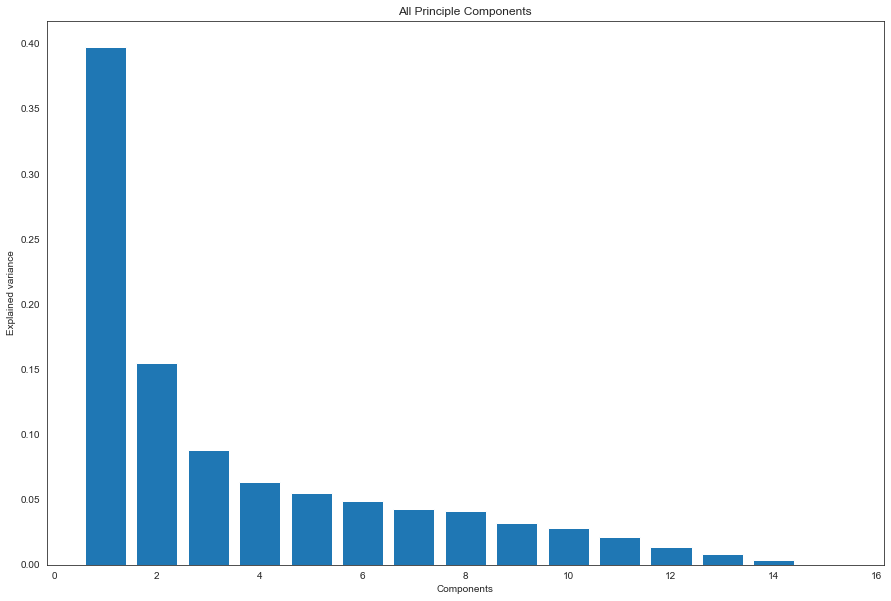

In [44]:
# Run PCA and fit the model
myPCA = PCA()
x = myPCA.fit(chile_data_s_2)

# Plotting the varaince explained by each component
plt.bar(range(1,len(x.explained_variance_ )+1),x.explained_variance_ratio_)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.title('All Principle Components')
pass

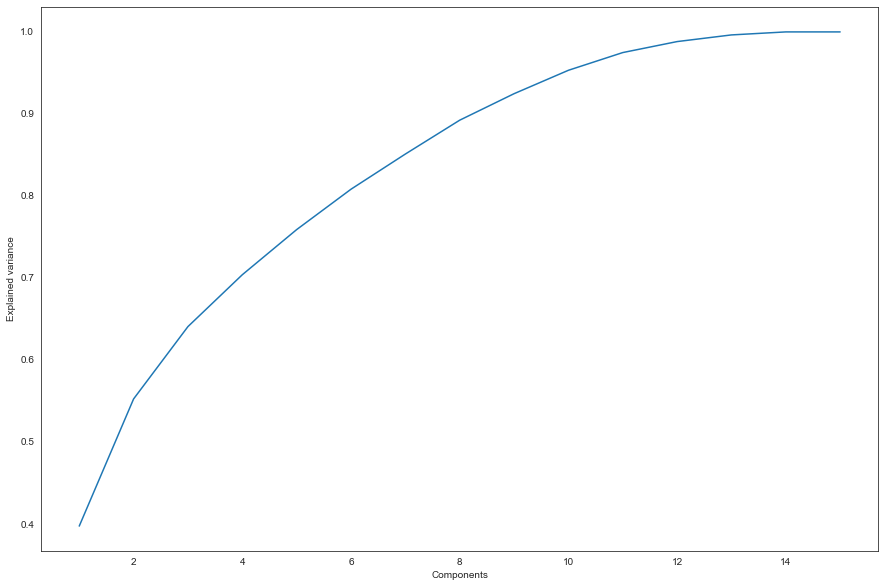

In [45]:
# Deciding on the number of principal componenets to chose
plt.plot(range(1, len(x.explained_variance_)+1), x.explained_variance_ratio_.cumsum())
plt.ylabel('Explained variance')
plt.xlabel('Components')
pass

In [46]:
# Calculate the numeric values of principal components
x.explained_variance_ratio_.cumsum()

array([0.39745947, 0.55249971, 0.640704  , 0.70392244, 0.75895429,
       0.80820215, 0.85108639, 0.89235968, 0.92466464, 0.95320508,
       0.97481075, 0.98820554, 0.99633   , 1.        , 1.        ])

In [47]:
# Calculate loadings
myPCA = PCA(n_components = 7)
pca_model = myPCA.fit(chile_data_s_2)

# Print
print("The loadings are are \n {}".format(pca_model.components_))

The loadings are are 
 [[-1.30332178e-01 -9.52767465e-02  1.97542722e-01 -7.19263035e-03
   5.94414084e-02  4.96532847e-03 -1.36239164e-01  2.20549720e-01
   5.99245207e-02 -9.45413064e-02 -3.00687334e-04 -1.71434494e-02
   1.07243777e-01  2.29956150e-01  2.18977625e-01  4.72432395e-02
   4.90814070e-02 -4.03357762e-02 -7.55854393e-02  4.67448610e-02
   2.20368411e-01 -3.68290616e-02  2.35531124e-01  2.31859605e-01
   2.33459170e-01  2.09991226e-01  2.34249240e-01  1.07668053e-01
   1.54725046e-02 -2.72552550e-02  2.29035959e-01 -2.79190071e-02
   2.07340495e-01  1.91544824e-01  2.25666766e-01  8.19362597e-02
  -1.23441883e-01  1.68403304e-01  2.13359024e-01 -6.40215531e-02
   2.21062931e-01  1.68753931e-01  1.93941959e-01 -2.90699045e-02]
 [ 2.45661869e-01  2.47808912e-01  5.77248909e-02  1.75373911e-01
   2.76301594e-01 -2.20148159e-01  2.74266696e-01  5.74968760e-02
   1.18232893e-01  2.86480847e-01 -2.08061241e-01 -3.59417651e-02
   2.87210865e-01 -2.14437854e-02  9.02728756e-02  6

In [48]:
# Explore the importance of each feature for principle components
pca = PCA(n_components = 7).fit(chile_data_s_2)
vars = pca.explained_variance_ratio_
c_names = chile_data_s_2.columns
sum = 0

print('Variance:  Projected dimension')
print('------------------------------')
for idx, row in enumerate(pca.components_):
    output = '{0:4.1f}%:    '.format(100.0 * vars[idx])
    output += " + ".join("{0:5.2f} * {1:s}".format(val, name) \
                      for val, name in zip(row, c_names))
    sum += 100*vars[idx]
    print(output)

print('Total variance explained by the 7 components {0:4.1f}%'.format(sum))
# Total variance explained by the 7 components 85.1.0%

Variance:  Projected dimension
------------------------------
39.7%:    -0.13 * Density of restaurants per 100,000 habitants + -0.10 * People working at restaurants per 10,000 habitants +  0.20 * Car rental agencies + -0.01 * Hospital beds per 10,000 habitants +  0.06 * Density of ATM machines per 100,000 habitants +  0.00 * Spas + -0.14 * Casinos per 100,000 habitants +  0.22 * Golf courses +  0.06 * Artwork Centers + -0.09 * Density of tourist guides per 100,000 habitants + -0.00 * Thermal centers + -0.02 * Density of sports centers per 10,000 habitants +  0.11 * Phone service penetration pero 1,000 habitants +  0.23 * Density of service stations +  0.22 * Number of certified tourism-operators +  0.05 * Percentage of crime perception +  0.05 * Percentage of homes with at least one crime victim per year + -0.04 * Density of murders per one million habitants + -0.08 * Density of public health complaints per one million habitants +  0.05 * Crime index +  0.22 * Allocated budget for publ

In [49]:
# We also can see this information for each component separately
# For instance, these are results for the Principal Component 1 (sorted)
pd.DataFrame(np.column_stack((chile_data_s_2.columns, pca.components_[0]))).sort_values(by = 1, ascending = False)


,0,1
22,Number of reported crimes,0.235531
26,Number of police units,0.234249
24,Number of accidents (roads; air; water),0.233459
23,Number of crimes investigated and resolved,0.23186
13,Density of service stations,0.229956
30,Yearly strikes,0.229036
34,Temporary residents,0.225667
40,Public infrastructure investments related to t...,0.221063
7,Golf courses,0.22055
20,Allocated budget for public safety (millions o...,0.220368


In [50]:
# Calculate factor scores
pca_model = myPCA.fit_transform(chile_data_s_2)
PCcomponents = pd.DataFrame(data = pca_model, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
print("\n The Factor scores are")
PCcomponents


 The Factor scores are


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-2.393211,0.964700,0.247803,-2.897383,-2.065942,-0.222592,0.007087
1,-1.577216,0.057566,6.341602,-1.291902,1.104108,-0.686033,-1.436056
2,0.246793,2.018003,0.706171,4.634774,-1.366490,-2.534218,-0.349772
3,-1.836735,-0.312958,1.832382,1.605925,-1.383785,1.926977,1.965204
4,-0.998191,-1.968688,0.126224,0.837963,1.819926,1.010994,1.108896
5,1.196065,0.636520,-0.648049,-0.265580,-1.114619,-1.100637,-0.022912
6,14.473170,2.446988,0.096056,-0.773880,-0.040443,0.599161,0.559505
7,-1.362571,-0.683799,-1.131266,-1.689694,-0.989314,-1.519523,1.020006
8,-0.773239,-3.419764,-0.568995,-1.002558,-1.218893,0.241885,0.871583
9,2.090559,-2.922085,-0.678285,-0.224028,0.746356,-0.536070,-2.326948


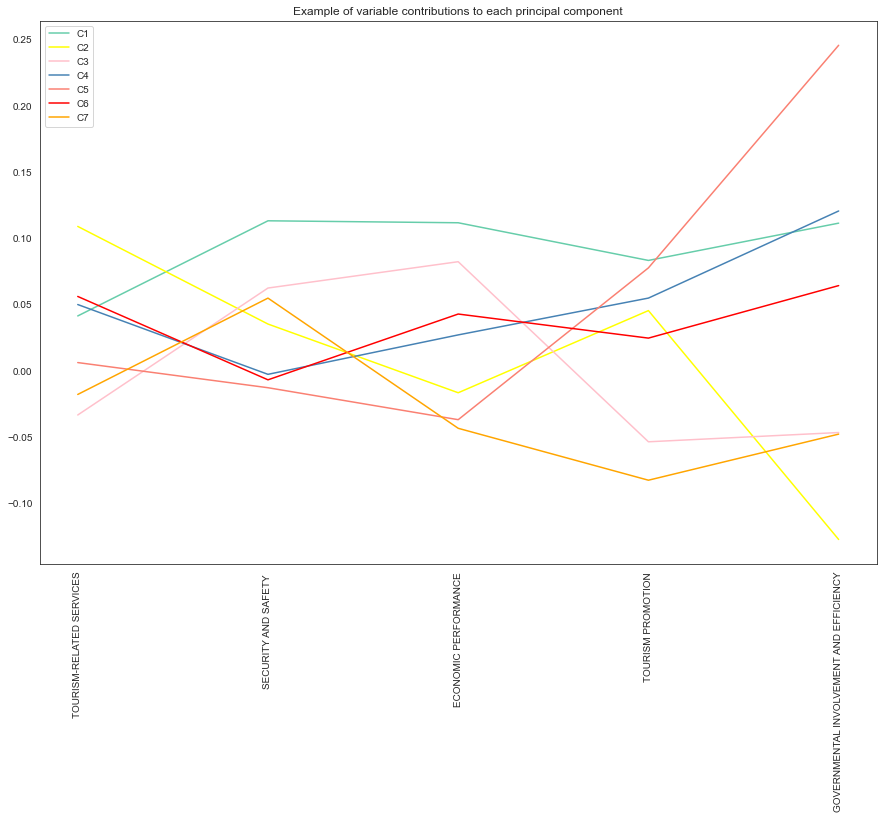

In [51]:
# Example of different variables in each component

# Fit the model
myPCA = PCA(n_components = 7)
pca_model = myPCA.fit(chile_data_s_2)
y_axis = [0,0,0,0,0,0,0]
for i in range(0,7):
    y_axis[i]=[np.mean(pca_model.components_[i][0:15]), np.mean(pca_model.components_[i][15:27]), 
               np.mean(pca_model.components_[i][27:36]), np.mean(pca_model.components_[i][36:41]),
               np.mean(pca_model.components_[i][41:46])]
# Plot
x_axis = ['TOURISM-RELATED SERVICES', 'SECURITY AND SAFETY ', 'ECONOMIC PERFORMANCE', 'TOURISM PROMOTION', 'GOVERNMENTAL INVOLVEMENT AND EFFICIENCY']
plt.plot(x_axis,y_axis[0], color = 'mediumaquamarine', label = "C1")
plt.plot(x_axis,y_axis[1], color = 'yellow', label = "C2")
plt.plot(x_axis,y_axis[2], color = 'pink', label = "C3")
plt.plot(x_axis,y_axis[3], color = 'steelblue', label = "C4")
plt.plot(x_axis,y_axis[4], color = 'salmon', label = "C5")
plt.plot(x_axis,y_axis[5], color = 'red', label = "C6")
plt.plot(x_axis,y_axis[6], color = 'orange', label = "C7")
plt.xticks(rotation = 90)
plt.title('Example of variable contributions to each principal component')
plt.legend()
pass

# Methodology steps:

## Step 1 - Calculate a weighted average for each variable in principal components.

In [60]:
# Creating a dataframe of weights
weights = pd.DataFrame(np.column_stack((chile_data_s_2.columns, pca_model.components_[0] * 
                                        pca_model.explained_variance_ratio_[0],
                                        pca_model.components_[1] * pca_model.explained_variance_ratio_[1],
                                        pca_model.components_[2] * pca_model.explained_variance_ratio_[2],
                                        pca_model.components_[3] * pca_model.explained_variance_ratio_[3],
                                        pca_model.components_[4] * pca_model.explained_variance_ratio_[4],
                                        pca_model.components_[5] * pca_model.explained_variance_ratio_[5],
                                        pca_model.components_[6] * pca_model.explained_variance_ratio_[6])))
weights = weights.set_index(0)

# Create a weighted average
weights['weighted_average'] = weights.sum(axis = 1)/np.sum(pca_model.explained_variance_ratio_)

# Print
weights

,1,2,3,4,5,6,7,weighted_average
0,,,,,,,,
"Density of restaurants per 100,000 habitants",-0.0518018,0.0380875,-0.00537445,0.00484975,0.00627232,0.00114379,0.00771348,0.001046
"People working at restaurants per 10,000 habitants",-0.0378686,0.0384204,-0.0090555,0.00156834,-0.00219897,-0.0024952,0.00018365,-0.013449
Car rental agencies,0.0785152,0.00894968,-0.00756863,0.01052,0.00146372,0.00669042,0.00423383,0.120792
"Hospital beds per 10,000 habitants",-0.00285878,0.02719,-0.0202325,0.0142783,-0.00847062,0.00330536,-0.0112212,0.002339
"Density of ATM machines per 100,000 habitants",0.0236256,0.0428379,0.0142437,0.0148756,-0.00393147,0.00362778,-0.00667185,0.104111
Spas,0.00197352,-0.0341318,-0.00523217,0.00965925,-0.00714473,0.0102228,-0.000384405,-0.029418
"Casinos per 100,000 habitants",-0.0541495,0.0425224,-0.00335227,-2.82299e-05,0.00655275,0.00913161,-0.00151377,-0.000984
Golf courses,0.0876596,0.00891433,0.000670587,-0.00347089,-0.00198459,-0.00210389,-0.000867228,0.104358
Artwork Centers,0.0238176,0.0183309,-0.0209619,-0.00249259,0.00218906,-0.0200543,0.00904708,0.011604


In [53]:
# Ranking for dimension 6

# Create a dataframe for relevant variables
dim6 = chile_data_s_2.iloc[:, 0:15].mul(weights['weighted_average'][0:15], axis = 1)

# Create a score ranking
dim6['Ranking 6'] = dim6.sum(axis = 1)

# Sort by score
dim6.sort_values(by = 'Ranking 6', ascending = False).head()

,"Density of restaurants per 100,000 habitants","People working at restaurants per 10,000 habitants",Car rental agencies,"Hospital beds per 10,000 habitants","Density of ATM machines per 100,000 habitants",Spas,"Casinos per 100,000 habitants",Golf courses,Artwork Centers,"Density of tourist guides per 100,000 habitants",Thermal centers,"Density of sports centers per 10,000 habitants","Phone service penetration pero 1,000 habitants",Density of service stations,Number of certified tourism-operators,Ranking 6
Regions,,,,,,,,,,,,,,,,
Metropolitana (RM),-0.001454,0.013445,0.358001,0.000117,0.137462,0.017857,0.001175,0.331350,0.011717,-0.007743,0.009821,-0.022323,0.205233,0.302629,0.435940,1.793227
Valparaso (V),0.001051,-0.017418,-0.003106,0.001295,0.047144,-0.026786,0.000616,0.155929,0.013367,-0.004856,0.022097,-0.001936,0.051160,0.053810,-0.023840,0.268528
Antofagasta (II),0.000172,-0.005534,0.066785,0.002449,0.172414,0.002976,0.000014,-0.019491,0.006766,-0.001631,0.034374,-0.024493,0.094775,-0.052394,-0.036612,0.240570
Magallanes y Antrtica (XII),0.001434,-0.030004,-0.049701,0.004920,0.194626,0.017857,-0.002627,-0.058474,-0.010562,0.044096,0.058926,-0.003693,0.152797,-0.066048,-0.023840,0.229707
Atacama (III),0.000611,0.003184,0.031840,0.000101,0.050654,0.012897,0.000047,-0.058474,-0.015513,-0.002401,0.022097,0.068149,-0.020016,-0.055428,-0.049384,-0.011633


In [54]:
# Ranking for dimension 7

# Create a dataframe for relevant variables
dim7 = chile_data_s_2.iloc[:, 15:27].mul(weights['weighted_average'][15:27], axis = 1)

# Create a score ranking
dim7['Ranking 7'] = dim7.sum(axis = 1)

# Sort by score
dim7.sort_values(by = 'Ranking 7', ascending = False).head()

,Percentage of crime perception,Percentage of homes with at least one crime victim per year,Density of murders per one million habitants,Density of public health complaints per one million habitants,Crime index,Allocated budget for public safety (millions of chilean pesos),Porcentage of homes that reported at least one crime,Number of reported crimes,Number of crimes investigated and resolved,Number of accidents (roads; air; water),Illegal commerce,Number of police units,Ranking 7
Regions,,,,,,,,,,,,,
Metropolitana (RM),0.034629,0.010131,-0.019089,0.010144,0.048411,0.292055,0.014351,0.407825,0.362736,0.379686,0.456793,0.361721,2.359394
Biobo (VIII),0.022502,0.015432,-0.020482,0.013688,0.002180,0.138924,0.021510,0.052289,0.078975,0.037087,-0.050879,0.069067,0.380293
Valparaso (V),-0.027016,0.008717,0.003002,0.003228,0.013275,0.002718,0.003613,0.028938,0.078595,0.057648,-0.042225,0.048650,0.179142
Antofagasta (II),0.210472,0.016845,0.024407,0.013688,-0.033881,-0.011276,-0.021953,-0.018160,-0.045087,-0.029150,-0.052891,-0.045688,0.007326
Tarapac (I),0.084148,0.071269,0.003213,0.013688,0.090945,-0.072258,0.027646,-0.037356,-0.064663,-0.052975,-0.013581,-0.053864,-0.003789


In [55]:
# Ranking for dimension 8

# Create a dataframe for relevant variables
dim8 = chile_data_s_2.iloc[:, 27:36].mul(weights['weighted_average'][27:36], axis = 1)

# Create a score ranking
dim8['Ranking 8'] = dim8.sum(axis = 1)

# Sort by score
dim8.sort_values(by = 'Ranking 8', ascending = False).head()

,Unemployment rate,Poverty rate,Industrial and Intellectual property crimes,Yearly strikes,Average length of strikes,Estimated daily cost per individual participating on a strike,Banks per one million habitants,Temporary residents,Exports (volume in million chilean pesos),Ranking 8
Regions,,,,,,,,,,
Metropolitana (RM),-0.010053,0.040718,-0.003601,0.450372,-0.008219,0.419786,0.332212,0.443689,0.046499,1.711404
Antofagasta (II),0.000419,0.065614,-0.008299,0.006975,-0.015853,0.026761,-0.024687,-0.034511,0.210897,0.227315
Tarapac (I),0.010192,-0.035628,0.072696,-0.027899,-0.000867,0.125960,-0.037481,-0.044978,0.000022,0.062017
Los Lagos (X),0.019268,-0.009073,-0.006318,-0.047827,-0.020377,-0.067515,0.236198,-0.042347,-0.015444,0.046564
Valparaso (V),-0.008657,-0.005754,-0.001709,-0.007971,-0.012743,-0.018862,-0.035750,0.054764,0.016525,-0.020156


In [56]:
# Ranking for dimension 9

# Create a dataframe for relevant variables
dim9 = chile_data_s_2.iloc[:, 36:41].mul(weights['weighted_average'][36:41], axis = 1)

# Create a score ranking
dim9['Ranking 9'] = dim9.sum(axis = 1)

# Sort by score
dim9.sort_values(by = 'Ranking 9', ascending = False).head()

,Density of tourism offices per one million habitants,Number of tourism information offices,Average number of internet searches for main tourist attractions,Yearly budget for tourism promotion ($M),Public infrastructure investments related to the tourism sector ($),Ranking 9
Regions,,,,,,
Metropolitana (RM),-0.006232,0.295945,0.370530,0.124605,0.251474,1.036323
Antofagasta (II),0.000510,0.211653,-0.004111,-0.032088,-0.058382,0.117582
Coquimbo (IV),-0.003824,0.068313,0.082720,-0.021023,-0.015433,0.110754
Araucana (IX),-0.004745,0.025289,-0.038734,0.067834,-0.011736,0.037908
Atacama (III),0.000298,0.083624,-0.083073,0.083938,-0.062111,0.022677


In [57]:
# Ranking for dimension 10

# Create a dataframe for relevant variables
dim10 = chile_data_s_2.iloc[:, 41:46].mul(weights['weighted_average'][41:46], axis = 1)

# Create a score ranking
dim10['Ranking 10'] = dim10.sum(axis = 1)

# Sort by score
dim10.sort_values(by = 'Ranking 10', ascending = False).head()

,Entrepreneurial and Innovation funds allocated to tourism related projects ($),Governmental funds devoted to tourism development ($),Number of regional strategy plans for tourism development,Ranking 10
Regions,,,,
Metropolitana (RM),0.169712,0.146729,0.000699,0.317139
Los Lagos (X),0.145745,0.051069,-0.000349,0.196465
Biobo (VIII),0.035487,0.137589,-0.001397,0.171679
Araucana (IX),0.060207,0.023848,-0.000349,0.083706
Coquimbo (IV),0.079234,-0.009078,-0.001397,0.068759


In [58]:
# Create an aggregated dataframe with all scores
scoring_data2 = pd.concat([dim6.iloc[:,-1:], dim7.iloc[:,-1:], dim8.iloc[:,-1:], dim9.iloc[:,-1:], 
                           dim10.iloc[:,-1:]], axis = 1)

# Print
scoring_data2

,Ranking 6,Ranking 7,Ranking 8,Ranking 9,Ranking 10
Regions,,,,,
Arica y Parinacota (XV),-0.244203,-0.404306,-0.238596,-0.205449,-0.184988
Tarapac (I),-0.089708,-0.003789,0.062017,-0.013918,-0.160080
Antofagasta (II),0.240570,0.007326,0.227315,0.117582,0.054905
Atacama (III),-0.011633,-0.286306,-0.087613,0.022677,-0.121655
Coquimbo (IV),-0.273958,-0.231852,-0.191113,0.110754,0.068759
Valparaso (V),0.268528,0.179142,-0.020156,0.007854,0.015347
Metropolitana (RM),1.793227,2.359394,1.711404,1.036323,0.317139
O'Higgins (VI),-0.337860,-0.369228,-0.092272,-0.235089,-0.069694
Maule (VII),-0.447067,-0.233020,-0.336507,-0.083252,-0.038567
